In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_path = 'airplanedataset/Train/'
test_path = 'airplanedataset/Test/'

In [3]:
img = load_img(test_path + "B-52/3-1.jpg")

In [4]:
print(img_to_array(img).shape)

(230, 266, 3)


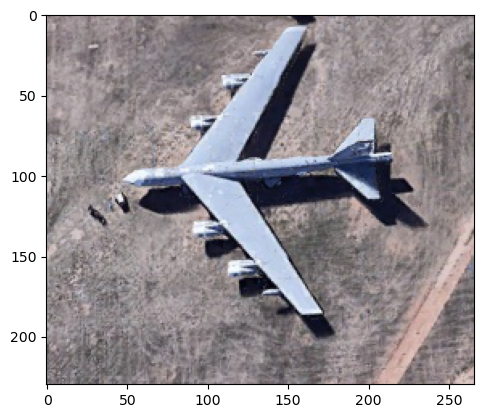

In [5]:
plt.imshow(img)
plt.show()

In [7]:
train_data = ImageDataGenerator().flow_from_directory(train_path, target_size = (224, 224))
test_data = ImageDataGenerator().flow_from_directory(test_path, target_size = (224, 224))

Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [8]:
SinifSayisi = 5

In [9]:
vgg = VGG16()

In [10]:
vgg_layers = vgg.layers

print(vgg_layers)

[<InputLayer name=input_layer, built=True>, <Conv2D name=block1_conv1, built=True>, <Conv2D name=block1_conv2, built=True>, <MaxPooling2D name=block1_pool, built=True>, <Conv2D name=block2_conv1, built=True>, <Conv2D name=block2_conv2, built=True>, <MaxPooling2D name=block2_pool, built=True>, <Conv2D name=block3_conv1, built=True>, <Conv2D name=block3_conv2, built=True>, <Conv2D name=block3_conv3, built=True>, <MaxPooling2D name=block3_pool, built=True>, <Conv2D name=block4_conv1, built=True>, <Conv2D name=block4_conv2, built=True>, <Conv2D name=block4_conv3, built=True>, <MaxPooling2D name=block4_pool, built=True>, <Conv2D name=block5_conv1, built=True>, <Conv2D name=block5_conv2, built=True>, <Conv2D name=block5_conv3, built=True>, <MaxPooling2D name=block5_pool, built=True>, <Flatten name=flatten, built=True>, <Dense name=fc1, built=True>, <Dense name=fc2, built=True>, <Dense name=predictions, built=True>]


In [12]:
vggmodel_layersize_tobe_used = len(vgg_layers)-1

model = Sequential()
for i in range(vggmodel_layersize_tobe_used):
    model.add(vgg_layers[i])

In [13]:
for layers in model.layers:
    layers.trainable = False

model.add(Dense(SinifSayisi, activation = 'softmax'))

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,281,029 (512.24 MB)

 Trainable params: 20,485 (80.02 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

None


In [14]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [16]:
batch_size = 4

model.fit(train_data,
                   steps_per_epoch = 400 // batch_size,
                   epochs = 3,
                   validation_data = test_data,
                   validation_steps = 200 // batch_size)

Epoch 1/3


C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 57/100 ━━━━━━━━━━━━━━━━━━━━ 1:22 2s/step - accuracy: 0.6648 - loss: 1.3418

C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.7283 - loss: 1.0349 - val_accuracy: 0.8200 - val_loss: 0.4437
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9634 - loss: 0.1107 - val_accuracy: 0.9600 - val_loss: 0.1115
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9843 - loss: 0.0452 - val_accuracy: 0.9100 - val_loss: 0.1222


In [17]:
img = Image.open('a10.jpg').resize((224,224))

In [18]:
img = np.array(img)

In [19]:
img.shape

(224, 224, 3)

In [20]:
print(img.ndim)

3


In [21]:
img = img.reshape(-1, 224, 224, 3)

In [22]:
img.shape

(1, 224, 224, 3)

In [23]:
img.ndim

4

In [24]:
img = preprocess_input(img)

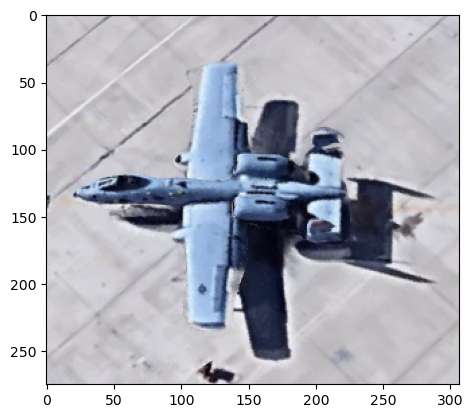

In [25]:
img_for_display = load_img('a10.jpg')
plt.imshow(img_for_display)
plt.show()

In [26]:
preds = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


In [27]:
preds

array([[0.97088236, 0.00352193, 0.00564763, 0.01246111, 0.00748694]],
      dtype=float32)

In [28]:
image_classes = ["A-10 Thunderbolt","Boeing B-52","Boeing E-3 Sentry","F-22 Raptor","KC-10 Extender"]

result = np.argmax(preds[0])

print(image_classes[result])

A-10 Thunderbolt
